In [1]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from scipy import stats
import math

In [2]:
pd.set_option('display.max_columns', None)
Data = pd.read_excel('RPAModel_DatabankV4.xlsx')
Data

,Date,DOW,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,AKL,SS,OKW,JAM,KID,SW,DO,Fcast
0,2021-10-03,Sunday,2563,3992,2159,2283,1908,0,0,4262,2114,1908,3840.0,631.020863,924,6765,5159,0,2294,4616,3684,4131,2633,1856,1828.0,844.000000,1597.000000,35474.0
1,2021-10-04,Monday,2585,3918,2190,2357,1913,0,0,4261,2205,1913,3889.0,596.958762,867,7119,5528,0,2467,4925,3691,4034,2618,1811,1880.0,828.000000,1595.000000,41800.0
2,2021-10-05,Tuesday,2689,3956,2281,2394,1926,0,0,4260,2222,1902,3864.0,572.318915,874,7321,5491,0,2537,4998,3632,3926,2561,1820,1812.0,830.000000,1575.000000,43100.0
3,2021-10-06,Wednesday,2763,4033,2557,2554,1966,0,0,4442,2317,2087,3784.0,576.840979,1059,7577,5752,0,2618,5115,3896,4107,2636,2064,1832.0,863.256198,1635.600812,44800.0
4,2021-10-07,Thursday,2927,4342,2885,2715,2069,0,0,4710,2501,2451,3494.0,612.863155,1243,7867,6157,0,2734,5139,4450,4528,2826,2550,1900.0,1161.798198,1855.555799,47300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2023-09-26,Tuesday,3704,2630,2574,2129,4556,2140,4102,2185,1536,3957,1599.0,1327.000000,6639,6645,3523,4826,5107,4919,4412,2631,3044,1875,1346.0,2521.000000,2521.000000,NaN
724,2023-09-27,Wednesday,3658,2555,2538,2048,4499,2113,4051,2149,1532,3908,1563.0,1311.000000,6556,6562,3479,4766,5043,4893,4477,2621,3010,1883,1232.0,2369.000000,2369.000000,NaN
725,2023-09-28,Thursday,3681,2583,2560,2092,4527,2127,4076,2153,1533,3932,1576.0,1319.000000,6597,6603,3501,4796,5075,4900,4475,2685,3019,1881,1122.0,2253.000000,2253.000000,NaN
726,2023-09-29,Friday,3436,2435,2373,2008,4226,1985,3805,2009,1458,3670,1419.0,1231.000000,6158,6164,3268,4477,4737,4614,4110,2444,2827,1787,962.0,2159.000000,2159.000000,NaN


In [3]:
zero_values = Data[Data == 0]
#print(zero_values)
Missing = (Data == 0).sum(axis=0)
Missing[Missing > 0]



FW         6
POR       11
POFQ      25
AS Sp    179
dtype: int64

In [4]:
zero_values = Data[Data == 0]
Missing = (Data == 0).sum(axis=1)
rows_to_drop = Missing[Missing > 0].index

Data = Data.drop(rows_to_drop)
Data

,Date,DOW,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,AKL,SS,OKW,JAM,KID,SW,DO,Fcast
179,2022-03-31,Thursday,2678,4307,2051,2889,2458,6390,2691,5742,2900,2621,4873.0,4087.323582,1570,7658,7254,660,5090,5557,5297,4753,2806,3410,1887.0,1753.091873,1816.312997,52900.0
180,2022-04-01,Friday,2720,4389,2393,2884,2444,6254,2618,6081,2899,2615,4826.0,4106.609832,1592,7566,7146,1566,4981,5474,5218,4716,2766,3381,1837.0,1875.202847,1976.627219,53300.0
181,2022-04-02,Saturday,3219,4435,2411,2855,2413,6236,2650,6029,2877,2621,4797.0,4078.883011,1661,7460,7045,1773,4978,5368,5148,4654,2751,3317,1831.0,1320.034237,1757.000000,53800.0
182,2022-04-03,Sunday,3305,4525,2445,2948,2415,6470,2727,6186,2696,2664,4832.0,3414.887800,1476,7720,7231,1883,4838,5245,5249,4725,2750,3366,1883.0,960.000000,1795.000000,58000.0
183,2022-04-04,Monday,3342,4548,2384,2919,2464,6643,2805,6149,2736,2710,4941.0,3389.994341,1514,8129,7296,1930,4950,5390,5371,4656,2756,3448,1923.0,961.000000,1800.000000,58900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2023-09-26,Tuesday,3704,2630,2574,2129,4556,2140,4102,2185,1536,3957,1599.0,1327.000000,6639,6645,3523,4826,5107,4919,4412,2631,3044,1875,1346.0,2521.000000,2521.000000,NaN
724,2023-09-27,Wednesday,3658,2555,2538,2048,4499,2113,4051,2149,1532,3908,1563.0,1311.000000,6556,6562,3479,4766,5043,4893,4477,2621,3010,1883,1232.0,2369.000000,2369.000000,NaN
725,2023-09-28,Thursday,3681,2583,2560,2092,4527,2127,4076,2153,1533,3932,1576.0,1319.000000,6597,6603,3501,4796,5075,4900,4475,2685,3019,1881,1122.0,2253.000000,2253.000000,NaN
726,2023-09-29,Friday,3436,2435,2373,2008,4226,1985,3805,2009,1458,3670,1419.0,1231.000000,6158,6164,3268,4477,4737,4614,4110,2444,2827,1787,962.0,2159.000000,2159.000000,NaN


In [5]:
####DID NOT AFFECT RESULTS####

#percentile_25 = Data.quantile(0.25, axis=1)

# Replace the zero values with the 25th percentile
#Data = Data.mask(Data == 0, percentile_25, axis=0)

# Print the updated dataframe
#print(Data)

##############################

In [6]:
one_hot_encoded = pd.get_dummies(Data['DOW'])

# Concatenate the one-hot encoded columns to the 'Data' DataFrame
Data = pd.concat([Data, one_hot_encoded], axis=1)

# Drop the original categorical column if needed
Data = Data.drop('DOW', axis=1)

Data

,Date,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,AKL,SS,OKW,JAM,KID,SW,DO,Fcast,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
179,2022-03-31,2678,4307,2051,2889,2458,6390,2691,5742,2900,2621,4873.0,4087.323582,1570,7658,7254,660,5090,5557,5297,4753,2806,3410,1887.0,1753.091873,1816.312997,52900.0,0,0,0,0,1,0,0
180,2022-04-01,2720,4389,2393,2884,2444,6254,2618,6081,2899,2615,4826.0,4106.609832,1592,7566,7146,1566,4981,5474,5218,4716,2766,3381,1837.0,1875.202847,1976.627219,53300.0,1,0,0,0,0,0,0
181,2022-04-02,3219,4435,2411,2855,2413,6236,2650,6029,2877,2621,4797.0,4078.883011,1661,7460,7045,1773,4978,5368,5148,4654,2751,3317,1831.0,1320.034237,1757.000000,53800.0,0,0,1,0,0,0,0
182,2022-04-03,3305,4525,2445,2948,2415,6470,2727,6186,2696,2664,4832.0,3414.887800,1476,7720,7231,1883,4838,5245,5249,4725,2750,3366,1883.0,960.000000,1795.000000,58000.0,0,0,0,1,0,0,0
183,2022-04-04,3342,4548,2384,2919,2464,6643,2805,6149,2736,2710,4941.0,3389.994341,1514,8129,7296,1930,4950,5390,5371,4656,2756,3448,1923.0,961.000000,1800.000000,58900.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2023-09-26,3704,2630,2574,2129,4556,2140,4102,2185,1536,3957,1599.0,1327.000000,6639,6645,3523,4826,5107,4919,4412,2631,3044,1875,1346.0,2521.000000,2521.000000,NaN,0,0,0,0,0,1,0
724,2023-09-27,3658,2555,2538,2048,4499,2113,4051,2149,1532,3908,1563.0,1311.000000,6556,6562,3479,4766,5043,4893,4477,2621,3010,1883,1232.0,2369.000000,2369.000000,NaN,0,0,0,0,0,0,1
725,2023-09-28,3681,2583,2560,2092,4527,2127,4076,2153,1533,3932,1576.0,1319.000000,6597,6603,3501,4796,5075,4900,4475,2685,3019,1881,1122.0,2253.000000,2253.000000,NaN,0,0,0,0,1,0,0
726,2023-09-29,3436,2435,2373,2008,4226,1985,3805,2009,1458,3670,1419.0,1231.000000,6158,6164,3268,4477,4737,4614,4110,2444,2827,1787,962.0,2159.000000,2159.000000,NaN,1,0,0,0,0,0,0


In [7]:
Data = Data.drop('Date', axis = 1)
Data = Data.drop('AKL', axis=1)
Data = Data.drop('SW', axis=1)
Data = Data.drop('DO', axis=1)

Data

,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Fcast,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
179,2678,4307,2051,2889,2458,6390,2691,5742,2900,2621,4873.0,4087.323582,1570,7658,7254,660,5090,5557,4753,2806,3410,1887.0,52900.0,0,0,0,0,1,0,0
180,2720,4389,2393,2884,2444,6254,2618,6081,2899,2615,4826.0,4106.609832,1592,7566,7146,1566,4981,5474,4716,2766,3381,1837.0,53300.0,1,0,0,0,0,0,0
181,3219,4435,2411,2855,2413,6236,2650,6029,2877,2621,4797.0,4078.883011,1661,7460,7045,1773,4978,5368,4654,2751,3317,1831.0,53800.0,0,0,1,0,0,0,0
182,3305,4525,2445,2948,2415,6470,2727,6186,2696,2664,4832.0,3414.887800,1476,7720,7231,1883,4838,5245,4725,2750,3366,1883.0,58000.0,0,0,0,1,0,0,0
183,3342,4548,2384,2919,2464,6643,2805,6149,2736,2710,4941.0,3389.994341,1514,8129,7296,1930,4950,5390,4656,2756,3448,1923.0,58900.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,3704,2630,2574,2129,4556,2140,4102,2185,1536,3957,1599.0,1327.000000,6639,6645,3523,4826,5107,4919,2631,3044,1875,1346.0,NaN,0,0,0,0,0,1,0
724,3658,2555,2538,2048,4499,2113,4051,2149,1532,3908,1563.0,1311.000000,6556,6562,3479,4766,5043,4893,2621,3010,1883,1232.0,NaN,0,0,0,0,0,0,1
725,3681,2583,2560,2092,4527,2127,4076,2153,1533,3932,1576.0,1319.000000,6597,6603,3501,4796,5075,4900,2685,3019,1881,1122.0,NaN,0,0,0,0,1,0,0
726,3436,2435,2373,2008,4226,1985,3805,2009,1458,3670,1419.0,1231.000000,6158,6164,3268,4477,4737,4614,2444,2827,1787,962.0,NaN,1,0,0,0,0,0,0


In [8]:
column_names = list(Data.columns)

# Remove the 'Fcast' column from the list
column_names.remove('Fcast')

# Move the 'Fcast' column to the front
column_names = ['Fcast'] + column_names

# Reorder the DataFrame columns
Data = Data[column_names]

Data

,Fcast,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
179,52900.0,2678,4307,2051,2889,2458,6390,2691,5742,2900,2621,4873.0,4087.323582,1570,7658,7254,660,5090,5557,4753,2806,3410,1887.0,0,0,0,0,1,0,0
180,53300.0,2720,4389,2393,2884,2444,6254,2618,6081,2899,2615,4826.0,4106.609832,1592,7566,7146,1566,4981,5474,4716,2766,3381,1837.0,1,0,0,0,0,0,0
181,53800.0,3219,4435,2411,2855,2413,6236,2650,6029,2877,2621,4797.0,4078.883011,1661,7460,7045,1773,4978,5368,4654,2751,3317,1831.0,0,0,1,0,0,0,0
182,58000.0,3305,4525,2445,2948,2415,6470,2727,6186,2696,2664,4832.0,3414.887800,1476,7720,7231,1883,4838,5245,4725,2750,3366,1883.0,0,0,0,1,0,0,0
183,58900.0,3342,4548,2384,2919,2464,6643,2805,6149,2736,2710,4941.0,3389.994341,1514,8129,7296,1930,4950,5390,4656,2756,3448,1923.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,NaN,3704,2630,2574,2129,4556,2140,4102,2185,1536,3957,1599.0,1327.000000,6639,6645,3523,4826,5107,4919,2631,3044,1875,1346.0,0,0,0,0,0,1,0
724,NaN,3658,2555,2538,2048,4499,2113,4051,2149,1532,3908,1563.0,1311.000000,6556,6562,3479,4766,5043,4893,2621,3010,1883,1232.0,0,0,0,0,0,0,1
725,NaN,3681,2583,2560,2092,4527,2127,4076,2153,1533,3932,1576.0,1319.000000,6597,6603,3501,4796,5075,4900,2685,3019,1881,1122.0,0,0,0,0,1,0,0
726,NaN,3436,2435,2373,2008,4226,1985,3805,2009,1458,3670,1419.0,1231.000000,6158,6164,3268,4477,4737,4614,2444,2827,1787,962.0,1,0,0,0,0,0,0


In [9]:
#####LITTLE CHANGE######

# Create new columns for each column in columns_to_check indicating if the resort is closed (1 for closed, 0 for not closed)
#for column in Data.columns[1:22]:
    #Data[column + '_closed'] = (Data[column] == 0).astype(int)
#Data

########################

In [10]:
Data_missing_values = Data.isnull()  # or df.isna()

# Count the number of missing values in each column
Data_missing_counts = Data_missing_values.sum()

# Display the missing value counts
print(Data_missing_counts)

Fcast        42
CO            0
FW            0
GF            0
PL            0
WL            0
POR           0
POFQ          0
CS            0
BC            0
BW            0
CB            0
RV            0
YC            0
PC            0
DAAR          0
AS Sp         0
AS Mu         0
AS Mo         0
SS            0
OKW           0
JAM           0
KID           0
Friday        0
Monday        0
Saturday      0
Sunday        0
Thursday      0
Tuesday       0
Wednesday     0
dtype: int64


In [11]:
Data_clean = Data.dropna()
Data_clean

,Fcast,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
179,52900.0,2678,4307,2051,2889,2458,6390,2691,5742,2900,2621,4873.0,4087.323582,1570,7658,7254,660,5090,5557,4753,2806,3410,1887.0,0,0,0,0,1,0,0
180,53300.0,2720,4389,2393,2884,2444,6254,2618,6081,2899,2615,4826.0,4106.609832,1592,7566,7146,1566,4981,5474,4716,2766,3381,1837.0,1,0,0,0,0,0,0
181,53800.0,3219,4435,2411,2855,2413,6236,2650,6029,2877,2621,4797.0,4078.883011,1661,7460,7045,1773,4978,5368,4654,2751,3317,1831.0,0,0,1,0,0,0,0
182,58000.0,3305,4525,2445,2948,2415,6470,2727,6186,2696,2664,4832.0,3414.887800,1476,7720,7231,1883,4838,5245,4725,2750,3366,1883.0,0,0,0,1,0,0,0
183,58900.0,3342,4548,2384,2919,2464,6643,2805,6149,2736,2710,4941.0,3389.994341,1514,8129,7296,1930,4950,5390,4656,2756,3448,1923.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,47291.0,3353,2703,2673,2252,4913,2275,4401,2731,2574,3784,1650.0,1615.000000,6632,6153,3508,4554,4862,4654,2536,2891,1763,1085.0,0,0,0,0,0,1,0
682,50600.0,3376,2720,2698,2274,4948,2291,4432,2722,2595,3811,1675.0,1626.000000,6680,6197,3534,4586,4897,4683,2538,2903,1780,1056.0,0,0,0,0,0,0,1
683,51700.0,3434,2768,2747,2320,5032,2330,4507,2783,2632,3875,1713.0,1654.000000,6793,6301,3593,4664,4980,4742,2570,2954,1788,1004.0,0,0,0,0,1,0,0
684,53700.0,3496,2836,2769,2374,5123,2372,4589,2848,2650,3946,1790.0,1684.000000,6916,6416,3659,4749,5070,4834,2635,3009,1825,958.0,1,0,0,0,0,0,0


In [12]:
Data_clean_missing_values = Data_clean.isnull()

Data_clean_missing_counts = Data_clean_missing_values.sum()

print(Data_clean_missing_counts)

Fcast        0
CO           0
FW           0
GF           0
PL           0
WL           0
POR          0
POFQ         0
CS           0
BC           0
BW           0
CB           0
RV           0
YC           0
PC           0
DAAR         0
AS Sp        0
AS Mu        0
AS Mo        0
SS           0
OKW          0
JAM          0
KID          0
Friday       0
Monday       0
Saturday     0
Sunday       0
Thursday     0
Tuesday      0
Wednesday    0
dtype: int64


In [13]:
Zscoredata = Data_clean.apply(zscore)
Zscoredata

,Fcast,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
179,0.322266,-3.490620,0.637512,-1.649993,0.827914,0.077878,1.219839,0.088176,0.879864,1.049917,0.292041,1.060399,1.926546,-0.356098,0.579574,1.100525,-3.102958,0.773343,0.946210,0.536356,0.109340,0.806065,0.212980,-0.412990,-0.406345,-0.412990,-0.406345,2.440970,-0.406345,-0.403005
180,0.394573,-3.315831,0.749761,-0.238206,0.805603,0.058490,1.111810,-0.048802,1.179581,1.046810,0.281376,0.997449,1.949941,-0.339859,0.453831,1.003569,-2.069628,0.566773,0.713337,0.481996,-0.076826,0.748828,0.009768,2.421366,-0.406345,-0.412990,-0.406345,-0.409673,-0.406345,-0.403005
181,0.484958,-1.239172,0.812730,-0.163902,0.676203,0.015560,1.097513,0.011243,1.133606,0.978470,0.292041,0.958608,1.916308,-0.288925,0.308953,0.912897,-1.833536,0.561087,0.415933,0.390905,-0.146638,0.622512,-0.014618,-0.412990,-0.406345,2.421366,-0.406345,-0.409673,-0.406345,-0.403005
182,1.244186,-0.881271,0.935931,-0.023549,1.091176,0.018329,1.283385,0.155727,1.272413,0.416220,0.368475,1.005485,1.110867,-0.425486,0.664314,1.079877,-1.708077,0.295767,0.070831,0.495219,-0.151292,0.719223,0.196723,-0.412990,-0.406345,-0.412990,2.460963,-0.409673,-0.406345,-0.403005
183,1.406878,-0.727290,0.967415,-0.275359,0.961776,0.086187,1.420803,0.302087,1.239701,0.540475,0.450241,1.151475,1.080670,-0.397436,1.223323,1.138231,-1.654471,0.508023,0.477658,0.393844,-0.123367,0.881065,0.359292,-0.412990,2.460963,-0.412990,-0.406345,-0.409673,-0.406345,-0.403005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,-0.691666,-0.681512,-1.558188,0.917643,-2.014423,3.477692,-2.048812,3.296839,-1.782222,0.037245,2.359314,-3.256339,-1.072438,3.380500,-1.477418,-2.262414,1.338307,0.341251,-1.587338,-2.720870,0.504942,-2.444601,-3.046542,-0.412990,-0.406345,-0.412990,-0.406345,-0.409673,2.460963,-0.403005
682,-0.093503,-0.585795,-1.534917,1.020843,-1.916257,3.526162,-2.036103,3.355008,-1.790179,0.102479,2.407308,-3.222855,-1.059094,3.415932,-1.417280,-2.239073,1.374804,0.407581,-1.505973,-2.717932,0.560792,-2.411049,-3.164405,-0.412990,-0.406345,-0.412990,-0.406345,-0.409673,-0.406345,2.481359
683,0.105343,-0.344419,-1.469210,1.223117,-1.711002,3.642489,-2.005124,3.495739,-1.736248,0.217414,2.521070,-3.171959,-1.025130,3.499344,-1.275135,-2.186106,1.463767,0.564877,-1.340436,-2.670917,0.798154,-2.395259,-3.375745,-0.412990,-0.406345,-0.412990,-0.406345,2.440970,-0.406345,-0.403005
684,0.466881,-0.086398,-1.376126,1.313934,-1.470050,3.768511,-1.971762,3.649604,-1.678780,0.273328,2.647275,-3.068829,-0.988739,3.590139,-1.117957,-2.126855,1.560713,0.735440,-1.082312,-2.575419,1.054132,-2.322233,-3.562700,2.421366,-0.406345,-0.412990,-0.406345,-0.409673,-0.406345,-0.403005


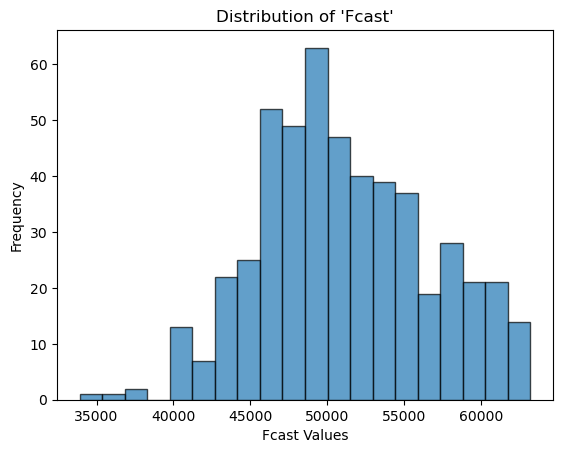

In [14]:
fcast = Data_clean['Fcast']

# Creating the bar chart
plt.hist(fcast, bins=20, edgecolor='black', alpha=0.7)

# Customizing the chart
plt.title("Distribution of 'Fcast'")
plt.xlabel("Fcast Values")
plt.ylabel("Frequency")

# Displaying the chart
plt.show()

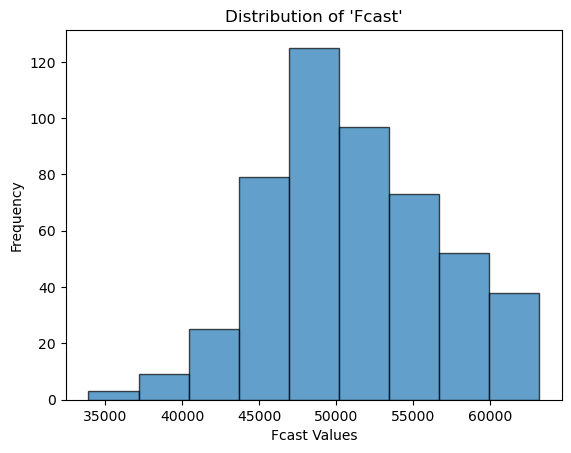

Sturges' Formula bins: 9
Freedman-Diaconis Rule bins: 16


In [15]:
N = len(fcast)
data_range = np.ptp(fcast)

# Calculate the optimal number of bins using Sturges' Formula
sturges_bins = int(np.ceil(np.log2(N + 1)))

# Calculate the optimal number of bins using the Freedman-Diaconis Rule
iqr = stats.iqr(fcast)
fd_bins = int(np.ceil(data_range / (2 * (iqr / (N ** (1/3))))))

# Creating the bar chart
plt.hist(fcast, bins=sturges_bins, edgecolor='black', alpha=0.7)

# Customizing the chart
plt.title("Distribution of 'Fcast'")
plt.xlabel("Fcast Values")
plt.ylabel("Frequency")

# Displaying the chart
plt.show()

# Print the number of bins calculated using different methods
print("Sturges' Formula bins:", sturges_bins)
print("Freedman-Diaconis Rule bins:", fd_bins)

In [16]:
filtered_df = Data_clean[Data_clean['Fcast'] < 40000]

# Display the filtered rows
print(filtered_df)

       Fcast    CO    FW    GF    PL    WL   POR  POFQ    CS    BC    BW  \
331  37700.0  3343  2119  2081  2693  1897  2273  1625  2561  2299  2166   
332  36700.0  3170  2371  2067  2630  1888  2117  1574  2390  2261  2091   
333  39800.0  3389  3471  2200  2700  2052  2416  1857  2467  2419  2230   
497  37054.0  3481  3248  2148  2615  1930  5609  2494  5464  2393  1843   
498  33900.0  3394  3003  2081  2605  1877  4851  2294  4132  2365  1759   
574  39966.0  3170  2819  2323  2547  2154  4749  2338  6318  2226  1740   
644  39878.0  3160  2249  2800  2140  4127  2016  3365  2248  2265  4407   
651  39983.0  3462  2598  2538  2070  4696  2272  3354  2281  2284  3653   

              CB      RV    YC    PC  DAAR  AS Sp  AS Mu  AS Mo    SS   OKW  \
331  2588.000000  1525.0  1522  5327  3897   1723   4467   4984  3135  2103   
332  2319.000000  1509.0  1554  5056  3780   1597   4219   4810  3229  2243   
333  2565.000000  1554.0  1592  5664  4293   2085   4533   5042  3678  2289   

In [17]:
filtered_df = Data_clean.drop(Data_clean[Data_clean['Fcast'] < 40000].index)

filtered_df

,Fcast,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
179,52900.0,2678,4307,2051,2889,2458,6390,2691,5742,2900,2621,4873.0,4087.323582,1570,7658,7254,660,5090,5557,4753,2806,3410,1887.0,0,0,0,0,1,0,0
180,53300.0,2720,4389,2393,2884,2444,6254,2618,6081,2899,2615,4826.0,4106.609832,1592,7566,7146,1566,4981,5474,4716,2766,3381,1837.0,1,0,0,0,0,0,0
181,53800.0,3219,4435,2411,2855,2413,6236,2650,6029,2877,2621,4797.0,4078.883011,1661,7460,7045,1773,4978,5368,4654,2751,3317,1831.0,0,0,1,0,0,0,0
182,58000.0,3305,4525,2445,2948,2415,6470,2727,6186,2696,2664,4832.0,3414.887800,1476,7720,7231,1883,4838,5245,4725,2750,3366,1883.0,0,0,0,1,0,0,0
183,58900.0,3342,4548,2384,2919,2464,6643,2805,6149,2736,2710,4941.0,3389.994341,1514,8129,7296,1930,4950,5390,4656,2756,3448,1923.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,47291.0,3353,2703,2673,2252,4913,2275,4401,2731,2574,3784,1650.0,1615.000000,6632,6153,3508,4554,4862,4654,2536,2891,1763,1085.0,0,0,0,0,0,1,0
682,50600.0,3376,2720,2698,2274,4948,2291,4432,2722,2595,3811,1675.0,1626.000000,6680,6197,3534,4586,4897,4683,2538,2903,1780,1056.0,0,0,0,0,0,0,1
683,51700.0,3434,2768,2747,2320,5032,2330,4507,2783,2632,3875,1713.0,1654.000000,6793,6301,3593,4664,4980,4742,2570,2954,1788,1004.0,0,0,0,0,1,0,0
684,53700.0,3496,2836,2769,2374,5123,2372,4589,2848,2650,3946,1790.0,1684.000000,6916,6416,3659,4749,5070,4834,2635,3009,1825,958.0,1,0,0,0,0,0,0


In [18]:
num_bootstrap_samples = 5

# Create an empty DataFrame to store the bootstrap samples
bootstrap_df = pd.DataFrame()

# Perform bootstrapping
for _ in range(num_bootstrap_samples):
    # Sample with replacement from the DataFrame
    bootstrap_sample = filtered_df.sample(n=len(filtered_df), replace=True)
    
    # Concatenate the bootstrap sample with the bootstrap DataFrame
    bootstrap_df = pd.concat([bootstrap_df, bootstrap_sample], ignore_index=True)

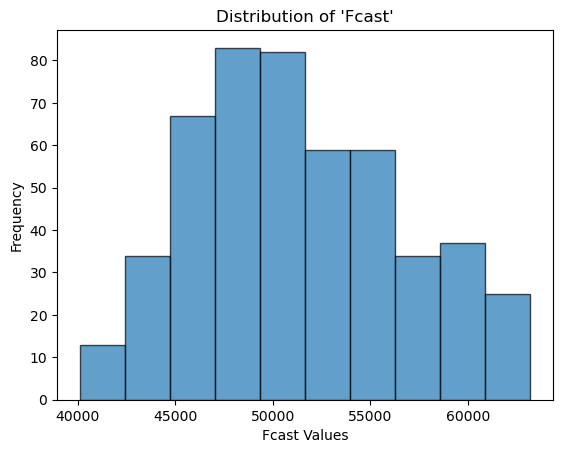

In [19]:
fcast = filtered_df['Fcast']

# Creating the bar chart
plt.hist(fcast, bins=10, edgecolor='black', alpha=0.7)

# Customizing the chart
plt.title("Distribution of 'Fcast'")
plt.xlabel("Fcast Values")
plt.ylabel("Frequency")

# Displaying the chart
plt.show()

In [20]:
print(bootstrap_df)

        Fcast    CO    FW    GF    PL    WL   POR  POFQ    CS    BC    BW  \
0     58900.0  3342  4548  2384  2919  2464  6643  2805  6149  2736  2710   
1     50300.0  3411  3969  2097  2609  1894  5604  2489  5087  2605  2008   
2     48700.0  3439  3974  2323  2625  2300  5268  2527  4695  2708  2336   
3     50200.0  3271  3515  2217  2501  1697  4843  2306  4559  2382  1857   
4     45900.0  3351  3588  2379  2516  2089  3952  2250  3332  2433  2214   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2460  51700.0  3436  4104  2145  2639  1832  5160  2457  5746  2474  1921   
2461  47562.0  3296  4072  2156  2638  2214  5106  2379  5454  2523  2458   
2462  44600.0  3414  3474  2364  2543  2084  3661  2210  2901  2327  2213   
2463  62200.0  3929  4867  2902  2901  2300  6503  2775  6473  2933  2763   
2464  62300.0  3353  4452  2613  2969  2421  6361  2942  4507  2938  2851   

          CB           RV    YC    PC  DAAR  AS Sp  AS Mu  AS Mo    SS   OK

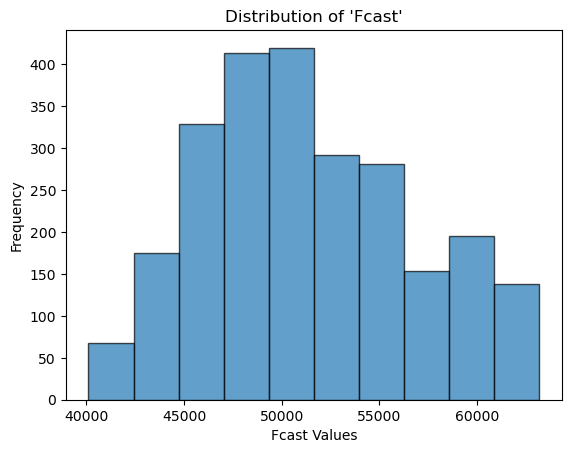

Normality test p-value: 1.933650433377007e-27
The data does not follow a normal distribution.


In [21]:
fcast = bootstrap_df['Fcast']

# Creating a histogram
plt.hist(fcast, bins=10, edgecolor='black', alpha=0.7)

# Customizing the chart
plt.title("Distribution of 'Fcast'")
plt.xlabel("Fcast Values")
plt.ylabel("Frequency")

# Displaying the histogram
plt.show()

# Perform a normality test
stat, p_value = stats.normaltest(fcast)

# Set the significance level
alpha = 0.05

# Print the results
print("Normality test p-value:", p_value)
if p_value < alpha:
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")

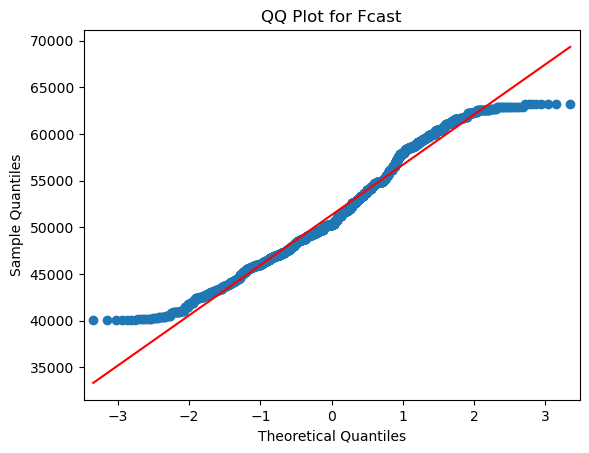

In [22]:
fcast_values = np.array(bootstrap_df['Fcast'])
sm.qqplot(fcast_values, line='s')
plt.title('QQ Plot for Fcast')
plt.show()

In [23]:
filtered_df = bootstrap_df

In [24]:
######TEST DATASPLIT AND MODELS#######

In [25]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(filtered_df, test_size=0.2, random_state=1)

In [26]:
train_df

,Fcast,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
669,50700.0,3556,3720,2436,2637,1941,4736,2403,4343,2590,2249,3757.0,2152.000000,1535,7425,6697,3030,4475,5052,4255,2589,2822,1877.0,0,0,0,0,0,1,0
2425,59200.0,3509,4017,2561,2651,2073,6143,2642,5389,2629,2318,4237.0,2398.000000,1563,7638,7093,3923,4876,5235,4642,2719,3423,1933.0,0,0,0,0,1,0,0
547,62600.0,3742,4534,2855,2799,1919,6428,2746,5254,2930,2692,4229.0,2319.000000,1904,7827,7217,4276,5068,5437,5107,3052,3474,2004.0,0,0,0,0,0,1,0
2253,47700.0,3480,4626,2035,2833,2339,4698,2487,4436,2717,1816,4353.0,2112.000000,1689,6964,6123,3277,4671,5469,4615,2749,2692,1886.0,0,0,1,0,0,0,0
2290,50000.0,3762,3470,2732,2832,2315,3723,2180,3295,2930,2788,4145.0,3300.857975,2055,6542,5218,2169,5075,5452,4926,2986,3270,2017.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,47200.0,3772,3758,2457,2808,2384,4100,2329,5692,2206,2393,4603.0,2265.000000,1834,6013,5743,2850,4412,5624,3667,2803,2904,1936.0,0,0,0,0,1,0,0
905,47038.0,3890,4689,2694,2813,2342,3445,2067,5403,2428,2218,4586.0,2454.000000,1876,5251,5530,2651,4459,5409,4401,2964,2742,1986.0,0,1,0,0,0,0,0
1096,61200.0,3932,5012,2891,2862,2292,6648,2758,5870,2949,2738,4231.0,2532.000000,2038,8255,7233,4102,5143,5432,5035,3034,3562,2037.0,0,1,0,0,0,0,0
235,49500.0,3466,3887,2505,2494,1964,5760,2541,5106,2570,2327,3769.0,2187.000000,1729,7501,6911,3775,4518,4908,4498,2701,3136,1815.0,0,1,0,0,0,0,0


In [27]:
test_df

,Fcast,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
481,47300.0,3214,3316,2074,2578,1858,4240,2304,4139,2084,1836,4171.000000,1928.000000,1168,7260,6631,3087,4583,5131,4167,2510,2730,1768.0,0,1,0,0,0,0,0
1976,42415.0,3325,2526,2444,2091,4436,2062,3932,2255,2260,3726,2125.865779,1500.000000,6173,5971,3017,4268,4506,4546,2840,2667,1879,966.0,0,0,0,1,0,0,0
280,49600.0,3461,4045,2547,2517,1917,5794,2567,5195,2563,2345,3740.000000,2249.000000,1760,7511,6883,3734,4557,4907,4498,2697,3115,1856.0,0,0,0,1,0,0,0
440,40182.0,3224,3096,1993,2480,1799,2618,1885,3030,1946,2072,2410.000000,1522.000000,1338,6334,4729,2632,4538,4919,3917,2469,2460,1758.0,0,1,0,0,0,0,0
107,54345.0,3822,4394,2405,2856,2407,6167,3025,5699,2929,2205,4607.000000,2013.000000,1638,8417,7304,4187,5308,5683,4591,2914,3515,1958.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,53526.0,3165,3458,2288,2585,2307,5303,2258,4403,2503,2432,4274.000000,3900.757342,1638,7336,6029,2764,4468,5049,4379,2577,2943,1827.0,0,0,0,0,0,1,0
1608,42415.0,3325,2526,2444,2091,4436,2062,3932,2255,2260,3726,2125.865779,1500.000000,6173,5971,3017,4268,4506,4546,2840,2667,1879,966.0,0,0,0,1,0,0,0
1975,50300.0,3485,3283,2453,2618,1939,6017,2575,4943,2604,2358,3823.000000,2125.000000,1483,7565,6944,3715,4676,5119,4593,2801,3192,1853.0,0,0,0,0,0,1,0
165,45978.0,3237,2327,2220,2592,2156,4152,2293,3631,2247,1773,3942.000000,1671.000000,1027,7214,6048,1242,1412,5004,3526,2392,2812,1742.0,0,0,0,0,0,1,0


In [28]:
X_train=train_df.copy()
X_train.drop(['Fcast'], axis=1, inplace=True)
Y_train=train_df[['Fcast']].copy()
X_test=test_df.copy()
X_test.drop(['Fcast'], axis=1, inplace=True)
Y_test=test_df[['Fcast']].copy()

In [29]:
X_train

,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
669,3556,3720,2436,2637,1941,4736,2403,4343,2590,2249,3757.0,2152.000000,1535,7425,6697,3030,4475,5052,4255,2589,2822,1877.0,0,0,0,0,0,1,0
2425,3509,4017,2561,2651,2073,6143,2642,5389,2629,2318,4237.0,2398.000000,1563,7638,7093,3923,4876,5235,4642,2719,3423,1933.0,0,0,0,0,1,0,0
547,3742,4534,2855,2799,1919,6428,2746,5254,2930,2692,4229.0,2319.000000,1904,7827,7217,4276,5068,5437,5107,3052,3474,2004.0,0,0,0,0,0,1,0
2253,3480,4626,2035,2833,2339,4698,2487,4436,2717,1816,4353.0,2112.000000,1689,6964,6123,3277,4671,5469,4615,2749,2692,1886.0,0,0,1,0,0,0,0
2290,3762,3470,2732,2832,2315,3723,2180,3295,2930,2788,4145.0,3300.857975,2055,6542,5218,2169,5075,5452,4926,2986,3270,2017.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,3772,3758,2457,2808,2384,4100,2329,5692,2206,2393,4603.0,2265.000000,1834,6013,5743,2850,4412,5624,3667,2803,2904,1936.0,0,0,0,0,1,0,0
905,3890,4689,2694,2813,2342,3445,2067,5403,2428,2218,4586.0,2454.000000,1876,5251,5530,2651,4459,5409,4401,2964,2742,1986.0,0,1,0,0,0,0,0
1096,3932,5012,2891,2862,2292,6648,2758,5870,2949,2738,4231.0,2532.000000,2038,8255,7233,4102,5143,5432,5035,3034,3562,2037.0,0,1,0,0,0,0,0
235,3466,3887,2505,2494,1964,5760,2541,5106,2570,2327,3769.0,2187.000000,1729,7501,6911,3775,4518,4908,4498,2701,3136,1815.0,0,1,0,0,0,0,0


In [30]:
Y_train

,Fcast
669,50700.0
2425,59200.0
547,62600.0
2253,47700.0
2290,50000.0
...,...
960,47200.0
905,47038.0
1096,61200.0
235,49500.0


In [31]:
X_test

,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
481,3214,3316,2074,2578,1858,4240,2304,4139,2084,1836,4171.000000,1928.000000,1168,7260,6631,3087,4583,5131,4167,2510,2730,1768.0,0,1,0,0,0,0,0
1976,3325,2526,2444,2091,4436,2062,3932,2255,2260,3726,2125.865779,1500.000000,6173,5971,3017,4268,4506,4546,2840,2667,1879,966.0,0,0,0,1,0,0,0
280,3461,4045,2547,2517,1917,5794,2567,5195,2563,2345,3740.000000,2249.000000,1760,7511,6883,3734,4557,4907,4498,2697,3115,1856.0,0,0,0,1,0,0,0
440,3224,3096,1993,2480,1799,2618,1885,3030,1946,2072,2410.000000,1522.000000,1338,6334,4729,2632,4538,4919,3917,2469,2460,1758.0,0,1,0,0,0,0,0
107,3822,4394,2405,2856,2407,6167,3025,5699,2929,2205,4607.000000,2013.000000,1638,8417,7304,4187,5308,5683,4591,2914,3515,1958.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,3165,3458,2288,2585,2307,5303,2258,4403,2503,2432,4274.000000,3900.757342,1638,7336,6029,2764,4468,5049,4379,2577,2943,1827.0,0,0,0,0,0,1,0
1608,3325,2526,2444,2091,4436,2062,3932,2255,2260,3726,2125.865779,1500.000000,6173,5971,3017,4268,4506,4546,2840,2667,1879,966.0,0,0,0,1,0,0,0
1975,3485,3283,2453,2618,1939,6017,2575,4943,2604,2358,3823.000000,2125.000000,1483,7565,6944,3715,4676,5119,4593,2801,3192,1853.0,0,0,0,0,0,1,0
165,3237,2327,2220,2592,2156,4152,2293,3631,2247,1773,3942.000000,1671.000000,1027,7214,6048,1242,1412,5004,3526,2392,2812,1742.0,0,0,0,0,0,1,0


In [32]:
Y_test

,Fcast
481,47300.0
1976,42415.0
280,49600.0
440,40182.0
107,54345.0
...,...
2146,53526.0
1608,42415.0
1975,50300.0
165,45978.0


In [33]:
X_train=X_train.values
Y_train=Y_train.values.reshape(-1)
X_test=X_test.values
Y_test=Y_test.values.reshape(-1)

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

scaler=MinMaxScaler()
#_train_s = scaler.fit_transform(X_train)
#_test_s = scaler.transform(X_test)

#_train_s.shape

In [35]:
#X_train = X_train_s
#X_test = X_test_s

#X_train=X_train_s
#X_test=X_test_s

In [36]:
#idx_list=np.arange(0, X_train.shape[0])
#train_idx=idx_list[0:468]
#val_idx=idx_list[468:]

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [37]:
#n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, 
#oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)



In [38]:
#import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
#param_grid = {
    #'n_estimators': [10, 30, 50, 75, 90, 100, 150, 200, 300],
    #'max_depth': [5, 10, 15, 20, 25, 50],
    #'min_samples_split': [2, 5, 10, 15],
    #'min_samples_leaf': [1, 3, 5, 7, 10]
#}

# Create the RandomForestRegressor model
#model = RandomForestRegressor(random_state=1)

# Perform grid search using GridSearchCV
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
#grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and corresponding metric
#best_params = grid_search.best_params_
#best_model = grid_search.best_estimator_
#Y_pred = best_model.predict(X_val)
#mse = mean_squared_error(Y_val, Y_pred)

# Print the best hyperparameters and the corresponding metric
#print('Best Parameters:', best_params)
#print('Best Mean Squared Error:', mse)



In [40]:
model = RandomForestRegressor(n_estimators=90, max_depth=20 , min_samples_split=2 , min_samples_leaf=1 , random_state= 50)
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_test_pred = model.predict(X_test)
Val_pred = model.predict(X_val)

# Evaluate the model 
KNNMSE = np.mean((Y_test - Y_test_pred)**2)
KNNMAE = np.mean(np.abs(Y_test - Y_test_pred))
KNNMAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('KNNMSE=', KNNMSE)
print('KNNMAE=', KNNMAE)
print('KNNMAPE=', KNNMAPE)

KNNMSE = np.mean((Y_val - Val_pred)**2)
KNNMAE = np.mean(np.abs(Y_val - Val_pred))
KNNMAPE =  np.mean(np.abs(Y_val - Val_pred)/Y_val)
print('KNNMSE=', KNNMSE)
print('KNNMAE=', KNNMAE)
print('KNNMAPE=', KNNMAPE)

KNNMSE= 360611.38583565294
KNNMAE= 249.97418407082156
KNNMAPE= 0.004820062967937269
KNNMSE= 410636.33140972554
KNNMAE= 262.6860721500303
KNNMAPE= 0.005219302156966095


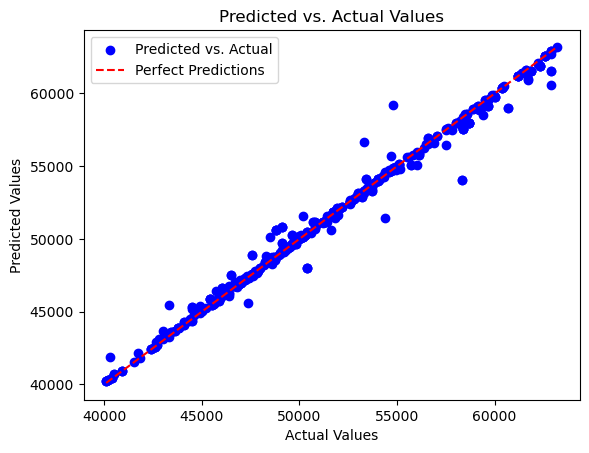

In [41]:
plt.scatter(Y_test, Y_test_pred, color='blue', label='Predicted vs. Actual')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')

# Adding a diagonal line for reference (perfect predictions)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Perfect Predictions')

plt.legend()

plt.show()

In [42]:
#####TEST ON NEW DATASET#####

In [43]:
NewData = pd.read_excel('DEMOPredictions.xlsx')
NewData.head()

,DOW,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID
0,Sunday,3525,3563,2524,2837,2419,4929,2196,5131,2239,2307,4416,2233.750036,1883,8233,5951,2485,4146,5068,4458,3036,2807,1939
1,Monday,3741,3761,2685,2840,2484,5036,2329,5215,2164,2359,4501,2276.719771,1890,8260,6349,2724,4411,5325,4428,3006,2759,1955
2,Tuesday,3839,3721,2703,2827,2475,5011,2410,5225,2173,2384,4529,2272.700098,1717,8309,6315,2670,4412,5362,4406,2984,2935,1931
3,Wednesday,3869,3797,2724,2825,2494,5005,2343,5953,1942,2351,4538,2213.126320,1517,8404,6305,2698,4721,5277,4345,3001,3081,1899
4,Thursday,3786,3930,2752,2839,2417,4677,2220,6034,2055,2334,4536,2211.827884,1535,8285,6352,2589,4896,5228,4290,3005,2937,1836


In [44]:
one_hot_encoded = pd.get_dummies(NewData['DOW'])

# Concatenate the one-hot encoded columns to the 'Data' DataFrame
NewData = pd.concat([NewData, one_hot_encoded], axis=1)

# Drop the original categorical column if needed
NewData = NewData.drop('DOW', axis=1)

NewData

,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,3525,3563,2524,2837,2419,4929,2196,5131,2239,2307,4416,2233.750036,1883,8233,5951,2485,4146,5068,4458,3036,2807,1939,0,0,0,1,0,0,0
1,3741,3761,2685,2840,2484,5036,2329,5215,2164,2359,4501,2276.719771,1890,8260,6349,2724,4411,5325,4428,3006,2759,1955,0,1,0,0,0,0,0
2,3839,3721,2703,2827,2475,5011,2410,5225,2173,2384,4529,2272.700098,1717,8309,6315,2670,4412,5362,4406,2984,2935,1931,0,0,0,0,0,1,0
3,3869,3797,2724,2825,2494,5005,2343,5953,1942,2351,4538,2213.126320,1517,8404,6305,2698,4721,5277,4345,3001,3081,1899,0,0,0,0,0,0,1
4,3786,3930,2752,2839,2417,4677,2220,6034,2055,2334,4536,2211.827884,1535,8285,6352,2589,4896,5228,4290,3005,2937,1836,0,0,0,0,1,0,0
5,3510,4315,2828,2843,2382,4415,2191,5839,2097,2303,4517,2210.677725,1607,7590,5641,2477,4526,4953,4073,2869,2657,1816,1,0,0,0,0,0,0
6,3493,4730,2680,2753,2269,4041,2174,5824,2414,2375,4508,2181.924178,1652,6694,5281,2516,4367,4960,4129,2872,2822,1784,0,0,1,0,0,0,0
7,3738,4754,2693,2788,2301,3649,2121,5188,2276,2026,4541,2280.500952,1458,5489,5122,2557,4002,5004,4571,2951,2654,1956,0,0,0,1,0,0,0
8,3890,4689,2694,2813,2342,3445,2067,5403,2428,2218,4586,2453.807698,1876,5251,5530,2651,4459,5409,4401,2964,2742,1986,0,1,0,0,0,0,0
9,3939,4694,2724,2843,2355,3381,2023,5744,2444,2338,4606,2418.761721,1897,5407,5598,2817,4524,5541,4190,2967,2790,1958,0,0,0,0,0,1,0


In [45]:
NewData

,CO,FW,GF,PL,WL,POR,POFQ,CS,BC,BW,CB,RV,YC,PC,DAAR,AS Sp,AS Mu,AS Mo,SS,OKW,JAM,KID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,3525,3563,2524,2837,2419,4929,2196,5131,2239,2307,4416,2233.750036,1883,8233,5951,2485,4146,5068,4458,3036,2807,1939,0,0,0,1,0,0,0
1,3741,3761,2685,2840,2484,5036,2329,5215,2164,2359,4501,2276.719771,1890,8260,6349,2724,4411,5325,4428,3006,2759,1955,0,1,0,0,0,0,0
2,3839,3721,2703,2827,2475,5011,2410,5225,2173,2384,4529,2272.700098,1717,8309,6315,2670,4412,5362,4406,2984,2935,1931,0,0,0,0,0,1,0
3,3869,3797,2724,2825,2494,5005,2343,5953,1942,2351,4538,2213.126320,1517,8404,6305,2698,4721,5277,4345,3001,3081,1899,0,0,0,0,0,0,1
4,3786,3930,2752,2839,2417,4677,2220,6034,2055,2334,4536,2211.827884,1535,8285,6352,2589,4896,5228,4290,3005,2937,1836,0,0,0,0,1,0,0
5,3510,4315,2828,2843,2382,4415,2191,5839,2097,2303,4517,2210.677725,1607,7590,5641,2477,4526,4953,4073,2869,2657,1816,1,0,0,0,0,0,0
6,3493,4730,2680,2753,2269,4041,2174,5824,2414,2375,4508,2181.924178,1652,6694,5281,2516,4367,4960,4129,2872,2822,1784,0,0,1,0,0,0,0
7,3738,4754,2693,2788,2301,3649,2121,5188,2276,2026,4541,2280.500952,1458,5489,5122,2557,4002,5004,4571,2951,2654,1956,0,0,0,1,0,0,0
8,3890,4689,2694,2813,2342,3445,2067,5403,2428,2218,4586,2453.807698,1876,5251,5530,2651,4459,5409,4401,2964,2742,1986,0,1,0,0,0,0,0
9,3939,4694,2724,2843,2355,3381,2023,5744,2444,2338,4606,2418.761721,1897,5407,5598,2817,4524,5541,4190,2967,2790,1958,0,0,0,0,0,1,0


In [46]:
X_Verification=NewData.copy()

X_Verification=X_Verification.values
X_Verification

array([[3.525e+03, 3.563e+03, 2.524e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.741e+03, 3.761e+03, 2.685e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.839e+03, 3.721e+03, 2.703e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [2.976e+03, 3.400e+03, 2.577e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.868e+03, 3.266e+03, 2.480e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.996e+03, 2.880e+03, 2.533e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [47]:
NewPredictions = model.predict(X_Verification)

In [48]:
# Create a range of dates using pandas
start_date = pd.to_datetime('2023-6-25')  # Set the start date
num_predictions = len(NewPredictions)
dates = pd.date_range(start=start_date, periods=num_predictions)

# Create a DataFrame with dates and predictions
Predictions = pd.DataFrame({'Date': dates, 'Prediction': NewPredictions})

# Print the DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
Predictions

,Date,Prediction
0,2023-06-25,47634.355556
1,2023-06-26,49100.000000
2,2023-06-27,49216.837607
3,2023-06-28,49666.611966
4,2023-06-29,49005.904274
5,2023-06-30,47336.600000
6,2023-07-01,46725.049673
7,2023-07-02,45472.188889
8,2023-07-03,47163.633333
9,2023-07-04,46822.000000


In [49]:
RMSE = math.sqrt(KNNMSE)
RMSE

640.809122445776

In [ ]:
import pickle

# Load the model in another notebook
with open('RPAmodel.pkl', 'rb') as file:
    RPAmodel = pickle.load(file)
    
new_data = pd.read_excel('DataForPredictions.xlsx') 
predictions = RPAmodel.predict(new_data)
